In [1]:
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
pretrain_data_X = np.asarray([np.random.normal(0,1,1000)])


pretrain_data_Y = np.squeeze(np.random.normal(0,1,1000))
pretrain_data_X = np.transpose(pretrain_data_X)
print(pretrain_data_Y.shape)

finetune_data_X = np.asarray([np.random.normal(3,4,100)])

finetune_data_Y = np.squeeze(np.random.normal(3,4,100))
finetune_data_X = np.transpose(finetune_data_X)



test_data_X = np.asarray([np.random.normal(3,4,10000)])

test_data_Y = np.squeeze( np.random.normal(3,4,10000))
test_data_X = np.transpose(test_data_X)


#X = np.random.random(100)
#Y = f(X) + np.random.normal(100, std=0.1)

#X, U ~ normal
#Y = f(X,U) + normal
#(Y, X) -> model


(1000,)


In [ ]:
pretrain_data_X.resize

<function ndarray.resize>

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


pretrained_model = RandomForestRegressor(max_depth=4,random_state=0).fit(pretrain_data_X, pretrain_data_Y)


#Y_gradient = gradient(Y_finetune, pretrained_model.predict(X_finetune))
#finetuned_model = BoostingModel().fit(X_finetune, Y_gradient)


In [ ]:
#Pretrained model gives a negative R^2 score, implying its worse than a horizontal line

pretrain_predictions = pretrained_model.predict(test_data_X)

rmse_pretrain = mean_squared_error(pretrain_predictions, test_data_Y, squared=False)

print(rmse_pretrain)

#pretrained_model.predict(np.transpose(finetune_data_X)).shape

4.8900294108324625


In [ ]:
pretrained_model.score(test_data_X, test_data_Y)


-0.4930329746606619

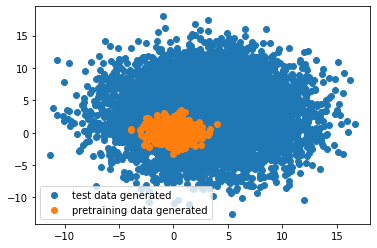

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(test_data_X,test_data_Y)

plt.scatter(pretrain_data_X,pretrain_data_Y)
plt.legend(['test data generated','pretraining data generated'])



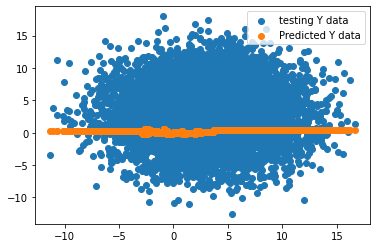

In [ ]:
plt.scatter(test_data_X,test_data_Y)

plt.scatter(test_data_X,pretrain_predictions)
plt.legend(['testing Y data', 'Predicted Y data'])

In [ ]:
#Y_gradient = np.gradient(np.asarray(finetune_data_Y), pretrained_model.predict(finetune_data_X));

#finetuned_model = GradientBoostingRegressor().fit(finetune_data_X, Y_gradient)
# This produces NaN values


In [ ]:
finetune_data_X.shape

(100, 1)

In [ ]:
# Unsure about the NaN values, according to https://stackoverflow.com/questions/55974046/numpy-gradient-returning-nan-values-when-using-varargs-array-with-constant-value
#This has something to do with the way the gradient thinks about the coordinate systems of the two vectors, so you use a cumsum to make things more like a increasing function I think?

y_pred = pretrained_model.predict(finetune_data_X)
#print(dX_finetune.shape)
#X_finetune = np.cumsum(dX_finetune)
grad = -2*sum(finetune_data_Y-y_pred) * y_pred 
 
#Y_gradient = np.gradient(np.asarray(finetune_data_Y), X_finetune);

#finetuned_model = pretrained_model.fit(dX_finetune, Y_gradient)



(100,)


In [ ]:
pretrained = model().fit(X_pretrain, Y_pretrain)

Y_finetune_pred = pretrained.predict(X_finetune)
grad = neg_grad_fn(Y_finetune, Y_finetune_pred) # if MSE loss, this is just 2(Y_finetune - Y_finetune_pred) or something

finetuned = model().fit(X_pretrain, Y=grad)

Y_test_pred = pretrained.predict(X_test) + finetuned.predict(X_test)

In [ ]:
pretrained = model().fit(X_pretrain, Y_pretrain)

Y_finetune_pred = pretrained.predict(X_finetune)
grad = neg_grad_fn(Y_finetune, Y_finetune_pred) # if MSE loss, this is just 2(Y_finetune - Y_finetune_pred) or something

finetuned = model().fit(X_pretrain, Y=grad)

Y_test_pred = pretrained.predict(X_test) + finetuned.predict(X_test)

In [ ]:
pretrained = model().fit(X_pretrain, Y_pretrain)

Y_finetune_pred = pretrained.predict(X_finetune)
grad = neg_grad_fn(Y_finetune, Y_finetune_pred) # if MSE loss, this is just 2(Y_finetune - Y_finetune_pred) or something

finetuned = model().fit(X_pretrain, Y=grad)

Y_test_pred = pretrained.predict(X_test) + finetuned.predict(X_test)

In [ ]:
#np.transpose(np.asarray([dX_finetune])).shape
Y_gradient = np.gradient(np.asarray(finetune_data_Y), X_finetune, edge_order=2);


In [ ]:
finetuned_model = RandomForestRegressor(max_depth=4,random_state=1).fit(finetune_data_X, Y_gradient)


In [ ]:
#finetuned_model = pretrained_model.fit(dX_finetune, Y_gradient)


In [ ]:
#RMSE Decreases by a small percentage

predicted_value = finetuned_model.predict(test_data_X)

rmse = mean_squared_error(predicted_value, test_data_Y, squared=False)
rmse
#finetuned_model.score(test_data_X, test_data_Y)



25.482637619077984

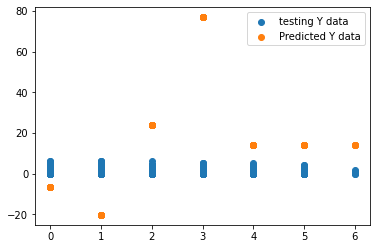

In [ ]:
plt.scatter(test_data_X,test_data_Y)

plt.scatter(test_data_X,predicted_value)
plt.legend(['testing Y data', 'Predicted Y data'])

In [ ]:
#finetuned_model.score(test_data_X, test_data_Y)
print(finetune_data_X.shape)
np.transpose(np.array([dX_finetune])).shape
dX_finetune.shape
predicted_value.shape

(100, 1)


(10000,)

In [ ]:
# Run iteration again
for i in range(25):
  new_input = np.transpose(np.array([dX_finetune]))
  dX_finetune = finetuned_model.predict(new_input)

  X_finetune = np.cumsum(dX_finetune)

  Y_gradient = np.gradient(np.asarray(finetune_data_Y), X_finetune);
  #Y_gradient = np.gradient(np.asarray(dX_finetune), np.cumsum(finetune_data_Y));
  #dX_finetune = np.squeeze(np.transpose([dX_finetune]))

  finetuned_model = RandomForestRegressor(max_depth=4,random_state=1).fit(new_input, Y_gradient)

  predicted_value = finetuned_model.predict(test_data_X)

  rmse = mean_squared_error(predicted_value, test_data_Y, squared=False)
  print(rmse)


1.295714372460468
1.4444378987191182
1.295714372460474
1.4444378987191178
1.2957143724604714
1.4444378987191178
1.2957143724604725
1.444437898719117
1.2957143724604716
1.4444378987191178
1.2957143724604732
1.4444378987191178
1.2957143724604747
1.444437898719119
1.2957143724604778
1.444437898719119
1.2957143724604752
1.444437898719119
1.2957143724604732
1.4444378987191184
1.2957143724604736
1.4444378987191184
1.2957143724604774
1.4444378987191198
1.2957143724604787


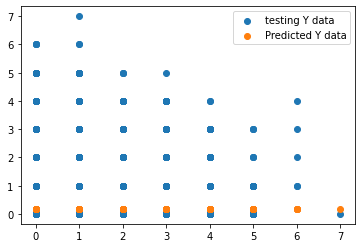

In [ ]:
plt.scatter(test_data_X,test_data_Y)

plt.scatter(test_data_X,predicted_value)
plt.legend(['testing Y data', 'Predicted Y data'])

In [ ]:
np.arange(f.size).shape

(6,)

# Neural Network Regression



In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(1)
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(pretrain_data_X, pretrain_data_Y)


In [ ]:
y_train=np.reshape(y_train, (-1,1))
y_val=np.reshape(y_val, (-1,1))
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(X_train))
xtrain_scale=scaler_x.transform(X_train)
print(scaler_x.fit(X_val))
xval_scale=scaler_x.transform(X_val)
print(scaler_y.fit(y_train))
ytrain_scale=scaler_y.transform(y_train)
print(scaler_y.fit(y_val))
yval_scale=scaler_y.transform(y_val)


MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [ ]:
model = Sequential()
model.add(Dense(8, input_dim=1, kernel_initializer='normal', activation='relu'))
model.add(Dense(2670, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 16        
_________________________________________________________________
dense_4 (Dense)              (None, 2670)              24030     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2671      
Total params: 26,717
Trainable params: 26,717
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(xtrain_scale, ytrain_scale, epochs=30, batch_size=150, verbose=1, validation_split=0.2)
predictions = model.predict(xval_scale)

Train on 600 samples, validate on 150 samples
Epoch 1/30
600/600 [==============================] - 1s 849us/sample - loss: 0.0259 - mse: 0.0259 - mae: 0.1291 - val_loss: 0.0243 - val_mse: 0.0243 - val_mae: 0.1265
Epoch 2/30
600/600 [==============================] - 0s 79us/sample - loss: 0.0254 - mse: 0.0254 - mae: 0.1280 - val_loss: 0.0242 - val_mse: 0.0242 - val_mae: 0.1273
Epoch 3/30
600/600 [==============================] - 0s 75us/sample - loss: 0.0254 - mse: 0.0254 - mae: 0.1278 - val_loss: 0.0246 - val_mse: 0.0246 - val_mae: 0.1293
Epoch 4/30
600/600 [==============================] - 0s 71us/sample - loss: 0.0255 - mse: 0.0255 - mae: 0.1283 - val_loss: 0.0243 - val_mse: 0.0243 - val_mae: 0.1264
Epoch 5/30
600/600 [==============================] - 0s 75us/sample - loss: 0.0253 - mse: 0.0253 - mae: 0.1276 - val_loss: 0.0244 - val_mse: 0.0244 - val_mae: 0.1282
Epoch 6/30
600/600 [==============================] - 0s 68us/sample - loss: 0.0256 - mse: 0.0256 - mae: 0.1283 - val_

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


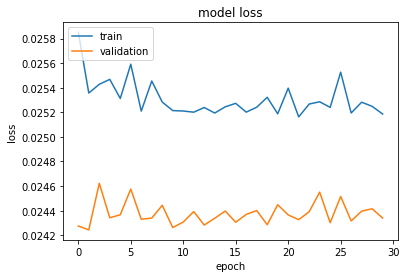

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
predictions = model.predict(test_data_X)
mean_absolute_error(test_data_Y,predictions)

0.855826078274846

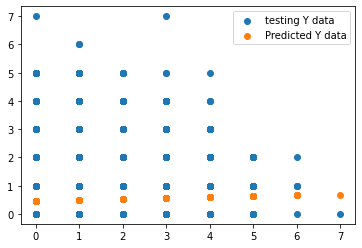

In [ ]:
plt.scatter(test_data_X,test_data_Y)

plt.scatter(test_data_X,predictions)
plt.legend(['testing Y data', 'Predicted Y data'])

In [ ]:

prediction_layer = tensorflow.keras.layers.Dense(1)
prediction_batch = prediction_layer(finetune_data_Y)
print(prediction_batch.shape)


(100, 1)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(finetune_data_X, finetune_data_Y)

prediction_layer = tensorflow.keras.layers.Dense(0)
prediction_batch = prediction_layer([y_train])

model.compile(loss='mse', optimizer="adam", metrics=['mse','mae'])

model.fit(X_train, prediction_batch, epochs=20, batch_size=128,validation_data=(X_val,y_val))

predictions = model.predict(X_val)

ValueError: ignored

In [ ]:
predictions = model.predict(test_data_X)
mean_absolute_error(test_data_Y,predictions)

0.7700368161082268

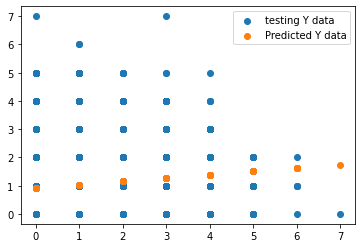

In [ ]:
plt.scatter(test_data_X,test_data_Y)

plt.scatter(test_data_X,predictions)
plt.legend(['testing Y data', 'Predicted Y data'])